In [1]:
from glob import glob
import os

import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

from sklearn.metrics import classification_report, confusion_matrix

In [2]:
m = 1
diff1 = datetime.datetime.today() - datetime.timedelta(hours=5) - datetime.timedelta(days=m-1)
now1 = diff1.strftime("%d_%m_%Y_%H_%M_%S")
diff2 = datetime.datetime.today() - datetime.timedelta(hours=5) - datetime.timedelta(days=m)
now2 = diff2.strftime("%d_%m_%Y_%H_%M_%S")
now1, now2

('15_12_2021_13_33_46', '14_12_2021_13_33_46')

In [70]:
header = 'target,n,diff1,diff2,media_rb_10,media_ra_10,media_rb_25,media_ra_25,media_rb_50,media_ra_50,media_rb_100,media_ra_100,media_rb_250,media_ra_250,intro_rb_10,intro_ra_10,intro_rb_25,intro_ra_25,intro_rb_50,intro_ra_50,intro_rb_100,intro_ra_100,intro_rb_250,intro_ra_250,adagio_rb_10,adagio_ra_10,adagio_rb_25,adagio_ra_25,adagio_rb_50,adagio_ra_50,adagio_rb_100,adagio_ra_100,adagio_rb_250,adagio_ra_250,scherzo_rb_10,scherzo_ra_10,scherzo_rb_25,scherzo_ra_25,scherzo_rb_50,scherzo_ra_50,scherzo_rb_100,scherzo_ra_100,scherzo_rb_250,scherzo_ra_250,outro_rb_10,outro_ra_10,outro_rb_25,outro_ra_25,outro_rb_50,outro_ra_50,outro_rb_100,outro_ra_100,outro_rb_250,outro_ra_250'
print(header)

target,n,diff1,diff2,media_rb_10,media_ra_10,media_rb_25,media_ra_25,media_rb_50,media_ra_50,media_rb_100,media_ra_100,media_rb_250,media_ra_250,intro_rb_10,intro_ra_10,intro_rb_25,intro_ra_25,intro_rb_50,intro_ra_50,intro_rb_100,intro_ra_100,intro_rb_250,intro_ra_250,adagio_rb_10,adagio_ra_10,adagio_rb_25,adagio_ra_25,adagio_rb_50,adagio_ra_50,adagio_rb_100,adagio_ra_100,adagio_rb_250,adagio_ra_250,scherzo_rb_10,scherzo_ra_10,scherzo_rb_25,scherzo_ra_25,scherzo_rb_50,scherzo_ra_50,scherzo_rb_100,scherzo_ra_100,scherzo_rb_250,scherzo_ra_250,outro_rb_10,outro_ra_10,outro_rb_25,outro_ra_25,outro_rb_50,outro_ra_50,outro_rb_100,outro_ra_100,outro_rb_250,outro_ra_250


In [1114]:
csvs = [i for i in glob("Xs/round2/*") if "_" not in i]
print(csvs)

['Xs/round2\\ada.csv', 'Xs/round2\\bch.csv', 'Xs/round2\\btc.csv', 'Xs/round2\\doge.csv', 'Xs/round2\\dot.csv', 'Xs/round2\\eos.csv', 'Xs/round2\\etc.csv', 'Xs/round2\\eth.csv', 'Xs/round2\\link.csv', 'Xs/round2\\ltc.csv', 'Xs/round2\\sol.csv', 'Xs/round2\\uni.csv', 'Xs/round2\\xlm.csv', 'Xs/round2\\xrp.csv']


In [1116]:
coins = [i.split(".")[0].split("\\")[-1] for i in glob("Xs/round2/*") if "_" not in i]
# ### drop general acc
# coins.remove('sol')
# ### drop acc 90
# coins.remove('doge')
# coins.remove('eth')
# coins.remove('uni')
# coins.remove('xlm')
# ### drop acc 92
# coins.remove('etc')
# coins.remove('ltc')
# ### drop %
# coins.remove('egld')
# coins.remove('bnb')
# coins.remove('fil')
# coins.remove('luna')
# coins.remove('theta')
print(coins)
len(coins)

['ada', 'bch', 'btc', 'doge', 'dot', 'eos', 'etc', 'eth', 'link', 'ltc', 'sol', 'uni', 'xlm', 'xrp']


14

In [1137]:
T1 = []
total = 0
for i in coins:
    ds = pd.read_csv(f'Xs/round2/{i}.csv')
    ds = ds.drop_duplicates().dropna()
    # print(i, str(round(ds.shape[0]/3373, 2))+"%")
    # print(i, str(round(ds.shape[0]/7719, 2))+"%") ### all
    # print(i, str(round(ds.shape[0]/2896, 2))+"%")
    # total+=ds.shape[0]
    T1.append(ds)
coin = 'all'

In [1138]:
T2 = []
total = 0
for i in coins:
    ds = pd.read_csv(f'Xs/round1/{i}.csv')
    ds = ds.drop_duplicates().dropna()
    # print(i, str(round(ds.shape[0]/3373, 2))+"%")
    # print(i, str(round(ds.shape[0]/7719, 2))+"%") ### all
    # print(i, str(round(ds.shape[0]/2896, 2))+"%")
    # total+=ds.shape[0]
    T2.append(ds)
coin = 'all'

In [1118]:
total

2896

In [1141]:
# # Cs = ["media_rb_25","media_ra_25","media_rb_50","media_ra_50","intro_rb_25","intro_ra_25","intro_rb_50","intro_ra_50","adagio_rb_10","adagio_ra_10","adagio_rb_25","adagio_ra_25","adagio_rb_50","adagio_ra_50","scherzo_rb_25","scherzo_ra_25","scherzo_rb_50","scherzo_ra_50"]
# mini = ['target', 'n', 'diff1', 'diff2']
# Cs = mini + ["media_rb_25","media_ra_25","intro_rb_25","intro_ra_25","intro_rb_50","intro_ra_50","adagio_rb_10","adagio_ra_10","adagio_rb_25","adagio_ra_25","adagio_rb_50","adagio_ra_50","scherzo_rb_10","scherzo_ra_10","scherzo_rb_25","scherzo_ra_25","scherzo_rb_50","scherzo_ra_50"]
# print(Cs)
# # Cx = ['target', 'n', 'diff1', 'diff2', 'media_rb_25', 'media_ra_25', 'media_rb_50', 'media_ra_50', 'media_rb_100', 'media_ra_100', 'intro_rb_25', 'intro_ra_25', 'intro_rb_50', 'intro_ra_50', 'intro_rb_100', 'intro_ra_100', 'adagio_rb_10', 'adagio_ra_10', 'adagio_rb_25', 'adagio_ra_25', 'adagio_rb_50', 'adagio_ra_50', 'adagio_rb_100', 'adagio_ra_100', 'scherzo_rb_25', 'scherzo_ra_25', 'scherzo_rb_50', 'scherzo_ra_50', 'scherzo_rb_100', 'scherzo_ra_100']
# # print(Cx)

ds = pd.concat(T1+T2, axis=0).drop_duplicates()# [Cs]
print(ds.shape)
ds.head(3)

(8592, 54)


,target,n,diff1,diff2,media_rb_10,media_ra_10,media_rb_25,media_ra_25,media_rb_50,media_ra_50,...,outro_rb_10,outro_ra_10,outro_rb_25,outro_ra_25,outro_rb_50,outro_ra_50,outro_rb_100,outro_ra_100,outro_rb_250,outro_ra_250
0,1.0,5.0,0.685687,1.001049,0.470480,0.529520,0.519650,0.480350,0.493376,0.506624,...,0.449218,0.550782,0.509957,0.490043,0.524450,0.475550,0.489591,0.510409,0.472838,0.527162
1,0.0,4.0,0.128506,0.451285,0.486180,0.513820,0.477848,0.522152,0.521652,0.478348,...,0.425607,0.574393,0.484575,0.515425,0.523329,0.476671,0.513296,0.486704,0.481504,0.518496
2,1.0,6.0,0.209147,0.515755,0.443569,0.556431,0.471258,0.528742,0.504821,0.495179,...,0.511948,0.488052,0.501723,0.498277,0.505666,0.494334,0.487643,0.512357,0.469902,0.530098


In [1154]:
pd.concat(T1+T2, axis=0).drop_duplicates().dropna().shape# [Cs]

(8592, 54)

In [1122]:
# mini = ['target', 'n', 'diff1', 'diff2']
# cs = ["media_rb_25","media_ra_25","media_rb_50","media_ra_50","intro_rb_10","intro_ra_10","intro_rb_25","intro_ra_25","intro_rb_50","intro_ra_50","adagio_rb_10","adagio_ra_10","adagio_rb_25","adagio_ra_25","adagio_rb_50","adagio_ra_50","scherzo_rb_10","scherzo_ra_10","scherzo_rb_25","scherzo_ra_25","scherzo_rb_50","scherzo_ra_50"]
# cm = mini + cs
# print(cm)

In [1123]:
# coin = coins[18]
# coin = 'ltc'.upper()
# ds = pd.read_csv(f'Xs/round2/{coin}.csv')
# print(ds.shape)
# ds = ds.drop_duplicates().dropna()#[cm]
# print(ds.shape)
# ds.head(3)

In [1101]:
# ds.isna().sum()

In [1142]:
ds.groupby('target').size()

target
0.0    4180
1.0    4412
dtype: int64

In [1143]:
# ds = df[da.coin!='ETH'].iloc[:]
X = ds.drop(columns=['target']).values
Y = ds.target.values
Y

array([1., 0., 1., ..., 0., 1., 0.])

In [1186]:
from sklearn.model_selection import train_test_split
#x_train, x_test, y_train, y_test = train_test_split(Xe, Ye, test_size = 0.25, random_state=42)
# x_train, x_test, y_train, y_test = train_test_split(Xl, Yl, test_size = 0.25, random_state=42)
x_train, x_test, y_train, y_test = train_test_split(X.astype(np.float64), Y, test_size = 0.25, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((6444, 53), (2148, 53), (6444,), (2148,))

In [1187]:
# Build Linear Regression Algorithm
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000)
lr.fit(x_train,y_train)
# Here lr.score first predict the y_test and then gives the accuracy
print("test accuracy {}".format(lr.score(x_test,y_test)))
lr_score=lr.score(x_test,y_test)

test accuracy 0.8985102420856611


              precision    recall  f1-score   support

           1       0.90      0.89      0.90      1065
           2       0.90      0.90      0.90      1083

    accuracy                           0.90      2148
   macro avg       0.90      0.90      0.90      2148
weighted avg       0.90      0.90      0.90      2148



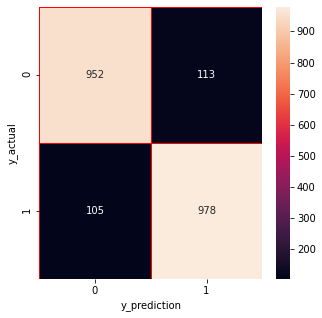

In [1188]:
# Here we use confusion matrix to evaluate the linear regression algorithm
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

y_prediction = lr.predict(x_test)
y_actual=y_test
cm = confusion_matrix(y_actual,y_prediction)
texto = classification_report(y_test, y_prediction, target_names=['1', '2'])
# texto = classification_report(y_test, y_prediction, target_names=['0', '1', '2'])
print(texto)
# Heatmap visualization of cunfusion matrix of Linear regression model
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_prediction")
plt.ylabel("y_actual")
plt.show()

2 nn score: 0.8766294227188082
0.8766294227188082


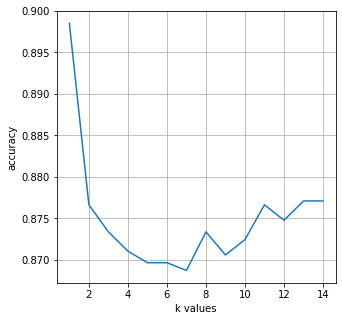

              precision    recall  f1-score   support

           1       0.83      0.95      0.88      1065
           2       0.94      0.81      0.87      1083

    accuracy                           0.88      2148
   macro avg       0.88      0.88      0.88      2148
weighted avg       0.88      0.88      0.88      2148



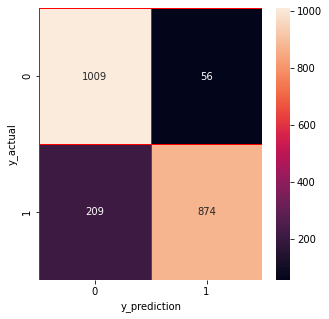

In [1189]:
# KNN Classification Model
from sklearn.neighbors import KNeighborsClassifier
k = 2
knn = KNeighborsClassifier(n_neighbors = k)
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
print("{} nn score: {}".format(k,knn.score(x_test,y_test)))

knn_score = knn.score(x_test,y_test)
print(knn_score)
# We can determine best k values with plotting k values versus accuracy
# Here we give values to k from 1 to 15 and calculate the accuracy each time,then plot them.
score_list = []
for each in range(1,15):
    knn2 = KNeighborsClassifier(n_neighbors = each)
    knn2.fit(x_train,y_train)
    score_list.append(knn2.score(x_test,y_test))

plt.figure(figsize=(5, 5))
plt.plot(range(1,15),score_list)
plt.xlabel("k values")
plt.ylabel("accuracy")
plt.grid()
plt.show()

y_prediction = knn.predict(x_test)
y_actual=y_test
cm = confusion_matrix(y_actual,y_prediction)
texto = classification_report(y_test, y_prediction, target_names=['1', '2'])
# texto = classification_report(y_test, y_prediction, target_names=['0', '1', '2'])
print(texto)
# Heatmap visualization of cunfusion matrix of Linear regression model
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_prediction")
plt.ylabel("y_actual")
plt.show()

score:  0.8663873370577281
              precision    recall  f1-score   support

           1       0.86      0.87      0.87      1065
           2       0.87      0.86      0.87      1083

    accuracy                           0.87      2148
   macro avg       0.87      0.87      0.87      2148
weighted avg       0.87      0.87      0.87      2148



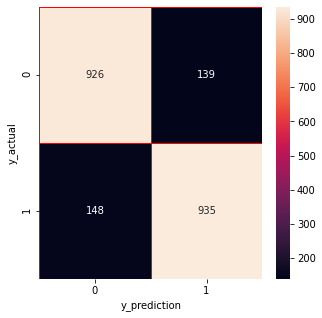

In [1190]:
# Build Decision Tree Classification Model
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = 42)
dt.fit(x_train,y_train)

print("score: ", dt.score(x_test,y_test))

dt_score=dt.score(x_test,y_test)
from sklearn.metrics import confusion_matrix
y_prediction = dt.predict(x_test)
y_actual = y_test
cm = confusion_matrix(y_actual,y_prediction)
texto = classification_report(y_test, y_prediction, target_names=['1', '2'])
# texto = classification_report(y_test, y_prediction, target_names=['0', '1', '2'])
print(texto)
# Heatmap visualization of cunfusion matrix of the Decision Tree Classification Model
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_prediction")
plt.ylabel("y_actual")
plt.show()

random forest algo result:  0.9185288640595903
              precision    recall  f1-score   support

           1       0.93      0.91      0.92      1065
           2       0.91      0.93      0.92      1083

    accuracy                           0.92      2148
   macro avg       0.92      0.92      0.92      2148
weighted avg       0.92      0.92      0.92      2148



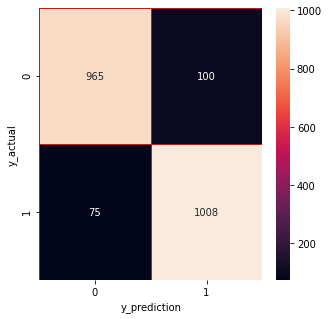

In [1191]:
# Build Random Forest Classification Model
from sklearn.ensemble import RandomForestClassifier
# n_estimators = 100 means this model will use 100 subsets.
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf.fit(x_train,y_train)
print("random forest algo result: ", rf.score(x_test,y_test))

rf_score = rf.score(x_test,y_test)
# Here we use confusion matrix to evaluate the Random Forest Classification Model
from sklearn.metrics import confusion_matrix
y_prediction = rf.predict(x_test)
y_actual = y_test
cm = confusion_matrix(y_actual,y_prediction)
texto = classification_report(y_test, y_prediction, target_names=['1', '2'])
# texto = classification_report(y_test, y_prediction, target_names=['0', '1', '2'])
print(texto)
# Heatmap visualization of cunfusion matrix of the Random Forest Classification Model
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_prediction")
plt.ylabel("y_actual")
plt.show()

In [1192]:
# import pickle
# diff1 = datetime.datetime.today()# - datetime.timedelta(hours=5) - datetime.timedelta(days=m-1)
# now = diff1.strftime("%d_%m_%Y_%H_%M_%S")
# filename = f'random_forest_model_kaboom_{now}.sav'
# pickle.dump(rf, open(filename, 'wb'))

# # some time later...

# # load the model from disk
# loaded_model = pickle.load(open(filename, 'rb'))
# result = loaded_model.score(x_test, y_test)
# print(result)

print accuracy of svm algo:  0.9087523277467412
              precision    recall  f1-score   support

           1       0.91      0.91      0.91      1065
           2       0.91      0.91      0.91      1083

    accuracy                           0.91      2148
   macro avg       0.91      0.91      0.91      2148
weighted avg       0.91      0.91      0.91      2148



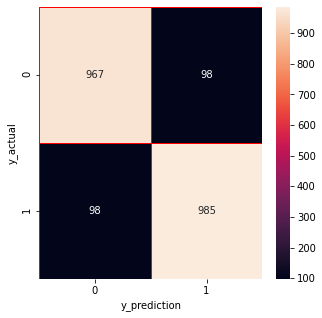

In [1193]:
# Build Support Vector Machine Model
from sklearn.svm import SVC
svm = SVC(kernel ='rbf', random_state = 42)
svm.fit(x_train,y_train)
# prediction and accuracy 
print("print accuracy of svm algo: ",svm.score(x_test,y_test))

svm_score = svm.score(x_test,y_test)
# Here we use confusion matrix to evaluate the Support Vector Machine Model
from sklearn.metrics import confusion_matrix
y_prediction = svm.predict(x_test)
y_actual = y_test
cm = confusion_matrix(y_actual,y_prediction)
texto = classification_report(y_test, y_prediction, target_names=['1', '2'])
# texto = classification_report(y_test, y_prediction, target_names=['0', '1', '2'])
print(texto)
# Heatmap visualization of cunfusion matrix of the Support Vector Machine Model
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_prediction")
plt.ylabel("y_actual")
plt.show()

print accuracy of naive bayes algo:  0.7271880819366853
              precision    recall  f1-score   support

           1       0.72      0.73      0.73      1065
           2       0.73      0.73      0.73      1083

    accuracy                           0.73      2148
   macro avg       0.73      0.73      0.73      2148
weighted avg       0.73      0.73      0.73      2148



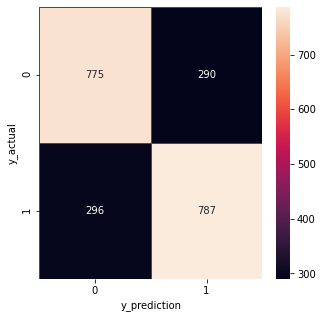

In [1194]:
# Build Naive Bayes Classification Model
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train,y_train)
 
print("print accuracy of naive bayes algo: ",nb.score(x_test,y_test))

nb_score = nb.score(x_test,y_test)
# Here we use confusion matrix to evaluate the Support Vector Machine Model
from sklearn.metrics import confusion_matrix
y_prediction = nb.predict(x_test)
y_actual = y_test
cm = confusion_matrix(y_actual,y_prediction)
texto = classification_report(y_test, y_prediction, target_names=['1', '2'])
# texto = classification_report(y_test, y_prediction, target_names=['0', '1', '2'])
print(texto)
# Heatmap visualization of cunfusion matrix of the Support Vector Machine Model
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_prediction")
plt.ylabel("y_actual")
plt.show()

(0.8985102420856611, 0.8766294227188082, 0.8663873370577281, 0.9185288640595903, 0.9087523277467412, 0.7271880819366853)


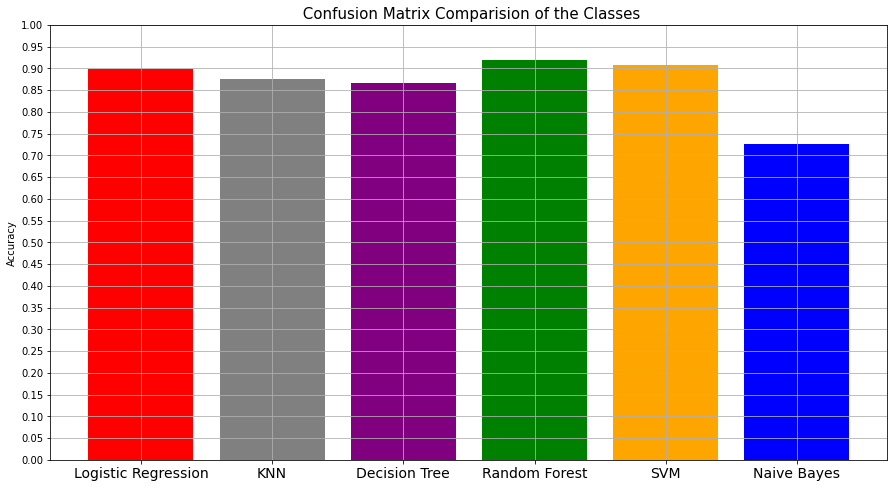

In [1195]:
class_name = ("Logistic Regression","KNN","Decision Tree","Random Forest","SVM","Naive Bayes")
class_score = (lr_score,knn_score,dt_score,rf_score,svm_score,nb_score)
print(class_score)
y_pos= np.arange(len(class_score))
colors = ("red","gray","purple","green","orange","blue")
plt.figure(figsize=(15,8))
plt.bar(y_pos,class_score,color=colors)
plt.xticks(y_pos,class_name,fontsize=14)
plt.yticks(np.arange(0.00, 1.05, step=0.05))
plt.ylabel('Accuracy')
plt.grid()
plt.title(" Confusion Matrix Comparision of the Classes",fontsize=15)
plt.savefig(f'acc_{coin}_{now1}.png')
plt.show()

In [1196]:
# load the model from disk
loaded_model = pickle.load(open('random_forest_model_kaboom_16_12_2021_08_34_46.sav', 'rb'))
result = loaded_model.score(x_test, y_test)
print(result)

0.9185288640595903


In [1205]:
%%timeit
loaded_model.predict(x_test)

54.1 ms ± 2.1 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [1206]:
%%timeit
loaded_model.predict(x_test[0].reshape(1, 53))

9.84 ms ± 315 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [824]:
header = 'target,n,diff1,diff2,media_rb_10,media_ra_10,media_rb_25,media_ra_25,media_rb_50,media_ra_50,media_rb_100,media_ra_100,media_rb_250,media_ra_250,intro_rb_10,intro_ra_10,intro_rb_25,intro_ra_25,intro_rb_50,intro_ra_50,intro_rb_100,intro_ra_100,intro_rb_250,intro_ra_250,adagio_rb_10,adagio_ra_10,adagio_rb_25,adagio_ra_25,adagio_rb_50,adagio_ra_50,adagio_rb_100,adagio_ra_100,adagio_rb_250,adagio_ra_250,scherzo_rb_10,scherzo_ra_10,scherzo_rb_25,scherzo_ra_25,scherzo_rb_50,scherzo_ra_50,scherzo_rb_100,scherzo_ra_100,scherzo_rb_250,scherzo_ra_250,outro_rb_10,outro_ra_10,outro_rb_25,outro_ra_25,outro_rb_50,outro_ra_50,outro_rb_100,outro_ra_100,outro_rb_250,outro_ra_250'
print(header)

target,n,diff1,diff2,media_rb_10,media_ra_10,media_rb_25,media_ra_25,media_rb_50,media_ra_50,media_rb_100,media_ra_100,media_rb_250,media_ra_250,intro_rb_10,intro_ra_10,intro_rb_25,intro_ra_25,intro_rb_50,intro_ra_50,intro_rb_100,intro_ra_100,intro_rb_250,intro_ra_250,adagio_rb_10,adagio_ra_10,adagio_rb_25,adagio_ra_25,adagio_rb_50,adagio_ra_50,adagio_rb_100,adagio_ra_100,adagio_rb_250,adagio_ra_250,scherzo_rb_10,scherzo_ra_10,scherzo_rb_25,scherzo_ra_25,scherzo_rb_50,scherzo_ra_50,scherzo_rb_100,scherzo_ra_100,scherzo_rb_250,scherzo_ra_250,outro_rb_10,outro_ra_10,outro_rb_25,outro_ra_25,outro_rb_50,outro_ra_50,outro_rb_100,outro_ra_100,outro_rb_250,outro_ra_250
